# Plotting 1

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Today's lecture: pie, bar, and scatter plots
- matplotlib is similar to MATLAB
- matplotlib integrates with pandas, just like sqlite3 integrates with pandas
- Series.plot.PLOT_FN(...)
- DataFrame.plot.PLOT_FN(...)
- Example PLOT_FNs: pie, scatter, bar, line

In [2]:
# import statements
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os
import matplotlib
from matplotlib import pyplot as plt

In [3]:
# Without this Jupyter notebook cannot display the "first" plot in older versions of 
# Python / mathplotlib / jupyter
# %matplotlib inline

In [4]:
# matplotlib font size settings
#matplotlib.rcParams #Uncomment to see the settings available in matplotlib
#matplotlib.rcParams["font.size"] #Uncomment to see the default setting for font.size
matplotlib.rcParams["font.size"] = 18 #Uncomment when you reach input cell which has the following question: 
### How to change font inside the figure? How to change size of the figure?

### Let's create a pandas Series
1. pandas Series can be made using list or dictionary.
2. pandas Series has both index (similar to dictionary key) and integer position (similar to list index).
3. While creating a brand new list, index and integer position are the same.

In [5]:
s = Series([5000000, 3000000, 2000000])
s

0    5000000
1    3000000
2    2000000
dtype: int64

## Pie plot
- gives you a sense of ratio

<AxesSubplot:ylabel='None'>

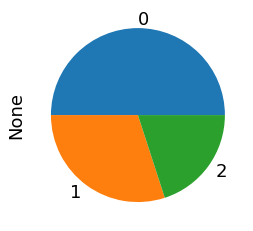

In [6]:
s.plot.pie()

### What's wrong with the above plot?

- The labels are all wrong.
- From where are you getting 0, 1, and 2 as labels? ---> let's fix just this
- It is difficult to read the actual numbers: we can only see the relative portions, not the absolute amounts
- It says "None" to the left.
- The font is tiny.
- No indication of what is being plotted here.

<AxesSubplot:ylabel='None'>

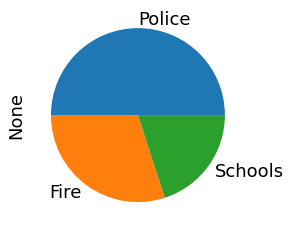

In [7]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
s.plot.pie() # Doesn't say the absolute numbers for each department

## Bar plot
- A lot of times bar plot is better
- You can see absolute numbers in bar plot

<AxesSubplot:>

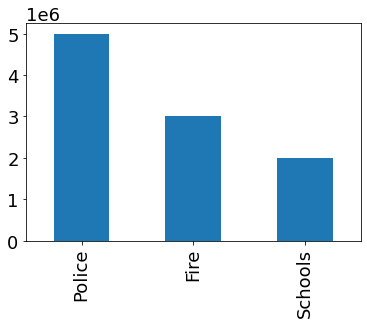

In [8]:
s.plot.bar()

### How can we set the x-axis, y-axis labels, and title?
- plot_FN(...) returns what is called as AxesSubplot

What is the type returned by a plot function?

matplotlib.axes._subplots.AxesSubplot

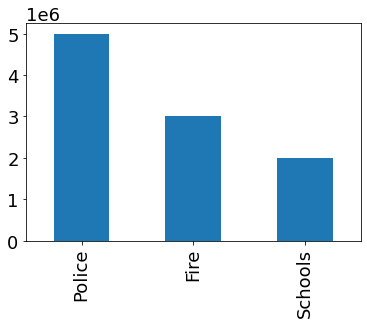

In [9]:
type(s.plot.bar())

Text(0.5, 1.0, 'Annual City Spending')

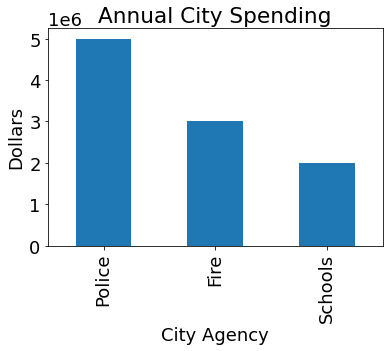

In [10]:
ax = s.plot.bar()
ax.set_ylabel("Dollars")
ax.set_xlabel("City Agency") # this is self-explanatory, so we will skip this for other example plots
ax.set_title("Annual City Spending")

### What is this 1e6? Can we make the y-axis values more readable?

Recall that you can easily apply element-wise operation on a Series.

In [11]:
s / 1000000

Police     5.0
Fire       3.0
Schools    2.0
dtype: float64

Text(0.5, 1.0, 'Annual City Spending')

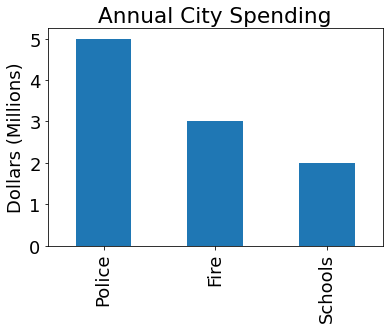

In [12]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### The x-axis tick labels are difficult to read. Can we rotate them to make it more readable?

How can we extract the indices from a Series?

In [13]:
s.index

Index(['Police', 'Fire', 'Schools'], dtype='object')

[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

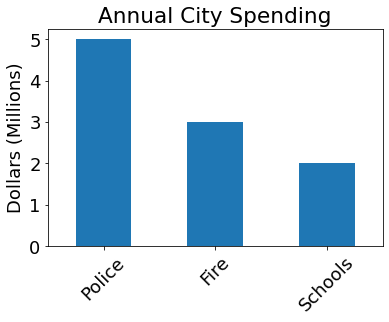

In [14]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.set_xticklabels(list(s.index), rotation = 45)

### How to change font inside the figure? 
- Need to import matplotlib
- Using matplotlib.rcParams["font.size"] = ????

Text(0.5, 1.0, 'Annual City Spending')

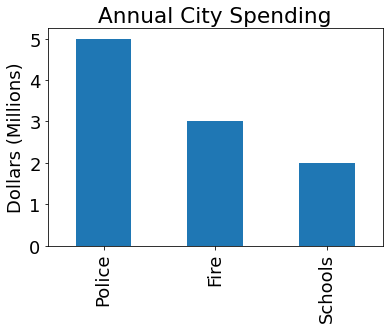

In [15]:
ax = (s / 1000000).plot.bar()
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we change the figure size?
- figsize argument to plot_FN(...)
- argument to figsize should be a tuple with two values: width and height

Text(0.5, 1.0, 'Annual City Spending')

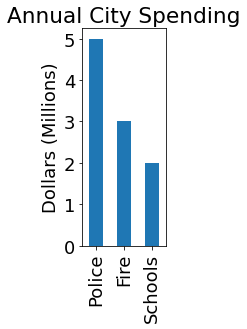

In [16]:
ax = (s / 1000000).plot.bar(figsize = (1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we make the bars horizontal?
- We have to switch figsize arguments
- We have to change y-label to x-label

Text(0.5, 1.0, 'Annual City Spending')

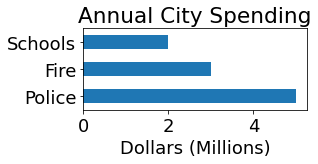

In [17]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5))
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we change bar color?
- color parameter in plot_FN(...)
    - 3 choices for arguments: 
        - full name of color
        - single letter representation of the color
        - grayscale (string value between "0" and "1")

Text(0.5, 1.0, 'Annual City Spending')

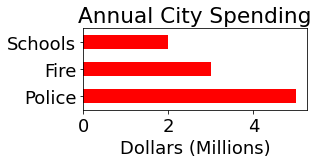

In [18]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "red")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

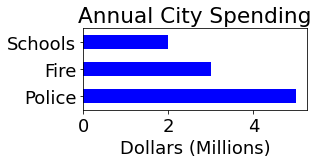

In [19]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "b")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

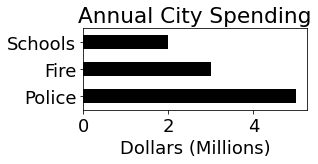

In [20]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "k")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

Text(0.5, 1.0, 'Annual City Spending')

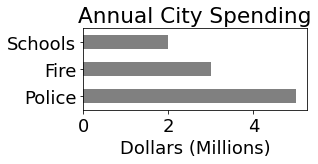

In [21]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we mark gridlines?

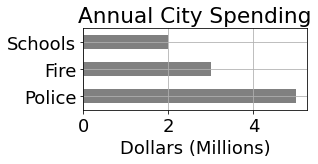

In [22]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.grid()

### How can we erase the top and right-hand side margin?
- ax.spines ---> gives list of spines

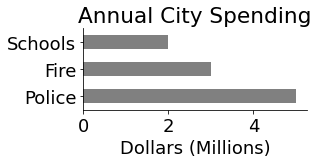

In [23]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
# ax.spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

### How can we capture subplots? 
- from matplotlib import pyplot as plt
- returns a tuple of figure, AxesSubplot
- we can use it to write a function that applies all the plot add-on aspects for all the plots in a report that we are writing

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

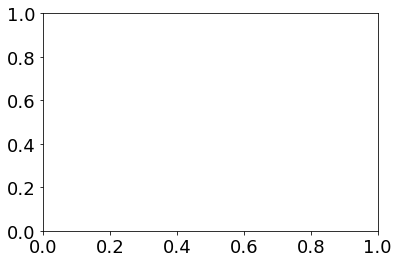

In [24]:
ret_val = plt.subplots() 
ret_val

Let's refactor the bar plot code ...

Text(0.5, 1.0, 'Annual City Spending')

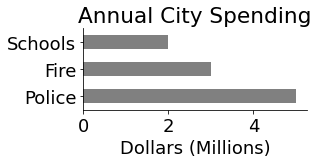

In [25]:
def get_ax(height = 3):
    # Tuple unpacking
    _, ax = plt.subplots(figsize = (4, height))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

ax = get_ax(1.5)
(s / 1000000).plot.barh(color = "0.5", ax = ax)
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

## bus.db examples

In [26]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

### Recap on exploring SQL database
- pd.read_sql(QUERY, CONNECTION)
- QUERY: SELECT * from sqlite_master
- QUERY: SELECT * from boarding

In [27]:
pd.read_sql("""
SELECT * FROM sqlite_master
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [28]:
pd.read_sql("""
SELECT * FROM boarding LIMIT 10
""", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
5,5,1167,4,43.077867,-89.369993,2.23
6,6,1167,10,43.077867,-89.369993,0.11
7,7,1167,38,43.077867,-89.369993,1.36
8,8,1169,3,43.089707,-89.329817,18.90
9,9,1169,37,43.089707,-89.329817,1.35


### What are the top routes, and how many people ride them daily?

In [29]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
""", conn)
df

,Route,daily
0,1,181.44
1,2,4808.03
2,3,2708.55
3,4,2656.99
4,5,1634.69
5,6,4537.02
6,10,4425.23
7,11,392.43
8,12,329.51
9,13,615.20


#### Let's take the daily column out as a Series ...

<AxesSubplot:>

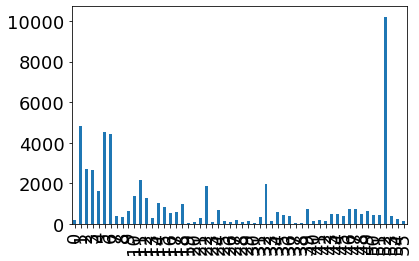

In [30]:
s = df["daily"]
s.plot.bar()

### Oops, too much data. Let's filter down to top 5 routes. How can we do that in SQL?

In [31]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
LIMIT 5
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


<AxesSubplot:>

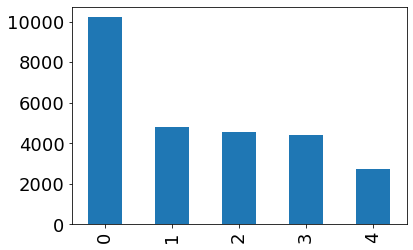

In [32]:
s = df["daily"]
s.plot.bar()

#### Huh, wat exactly is route 0? Where is that coming from?
- Oops, it is coming from dataframe row index!
- Let's fix that: we can use df.set_index(...)

<AxesSubplot:xlabel='Route'>

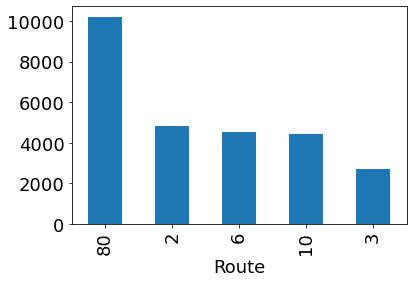

In [33]:
df = df.set_index("Route")
s = df["daily"]
s.plot.bar()

### Wouldn't it be nicer to have an "other" bar to repsent other routes?
- we have to now get rid of LIMIT clause
- we have to deal with other routes using pandas

In [34]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df = df.set_index("Route")
s = df["daily"]
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


#### We are back to plotting all route bars ...

<AxesSubplot:xlabel='Route'>

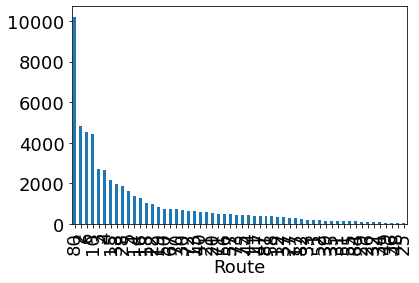

In [35]:
s.plot.bar()

### How can we slice a pandas dataframe?
- Recall that .iloc allows us to do slicing.
- For reproducing previous 5-route plot, we just need to take first 5 route details and populate into a series s.
- For the "other" part, we want all the rows in dataframe after row 5 summed up together.
- What should start and end in start:end be for getting the above two slices?
- Once we compute "other" count, we can add that back to the series s.

In [36]:
s = df["daily"].iloc[:5]
s["other"] = df["daily"].iloc[5:].sum()
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

<AxesSubplot:xlabel='Route'>

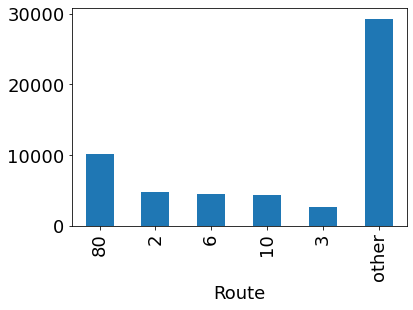

In [37]:
s.plot.bar()

### Let's fix the plot asthetics ...

Text(0, 0.5, 'Rides/Day (Thousands)')

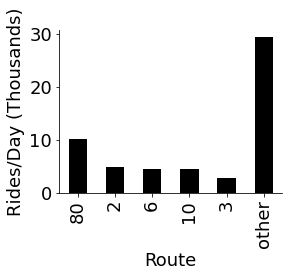

In [38]:
ax = get_ax()
(s / 1000).plot.bar(color = "k", ax = ax)
ax.set_ylabel("Rides/Day (Thousands)")
# Where did the xlabel come from? It comes from "set_index call on the dataframe"

### Scatter plot
- copy paste the data from trees.txt
- When we have a series to plot:
    - s.plot.bar()
    - index  => x-axis
    - values => y-axis
- When we have a data frame:
    - df.plot.scatter(x = column_name, y = column_name)
    

In [39]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = DataFrame(trees)
df

,age,height,diameter
0,1,1.5,0.8
1,1,1.9,1.2
2,1,1.8,1.4
3,2,1.8,0.9
4,2,2.5,1.5
5,2,3.0,1.8
6,2,2.9,1.7
7,3,3.2,2.1
8,3,3.0,2.0
9,3,2.4,2.2


<AxesSubplot:xlabel='age', ylabel='height'>

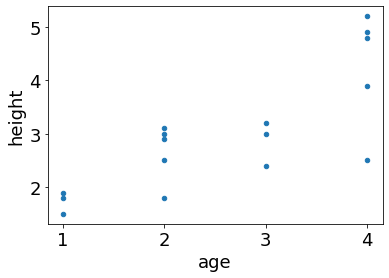

In [40]:
df.plot.scatter(x = "age", y = "height")

#### We will continue this example in the next lecture ...